# Neural Nets with TensorFlow and Keras

Today we will work with __the main neural network libraries__, the main one being developed for Python, [__TensorFlow__](https://www.tensorflow.org/).

<img src="https://www.ambientelivre.com.br/images/logos_open_source/tensorflow_logo.png" width=500>

__TensorFlow__ is an __extremely powerful framework__, but it has a __considerably complicated syntax__. To make life easier and uncomplicate Neural Networks, another library built on top of TensorFlow emerged, known as [__Keras__](https://keras.io/).

 <img src="https://www.pyimagesearch.com/wp-content/uploads/2020/02/keras_autoencoders_header.png" width=500>

Different from what we are used to with _SciKit-Learn_, __Keras__ is focused exclusively on Neural Networks, offering implementation of high-level functions, building these networks in a practical and simple way. Of course, unfortunately even __Keras__ has its limitations, when you need very specific modifications, you may need to resort to __TensorFlow__, although __Keras__ has the __majority of the main architectures__ of Neural Networks from __TensorFLow__ completely integrated.

## Multi Layer Perceptron (MLP)

Previously, a _Perceptron_ was built as a neural network from a neuron. The concept of _Perceptron_ is important to understand what is behind more complex neural networks. The __Multi Layer Perceptron__ networks (by the acronym MLP) are all types of networks where we have __several fully connected neuron layers__.

Having already known the main concepts behind neural networks and now abstracting to more complex networks, let's train a network now based on _MLP_.

## Training a Neural Network

The "learning" of the Neural Network from the data takes place through two steps, **Forward Propagation** and **Backward Propagation**.

### Forward Propagation

In the __Forward Propagation__, the information propagates in the usual direction (from left to right) in the neural network: features are read in the input layer, pass through the processing in the hidden layers, and the response (target) is predicted in the output layer.

For the prediction to be made, the neurons in the hidden layers perform the following two calculation steps:

- a linear combination between the output of the previous layer and the weights of the current layer.

- it is applied a __non-linear activation function__ to the linear combination above. The main activation functions used are:

<img src="https://cdn-images-1.medium.com/max/1000/1*4ZEDRpFuCIpUjNgjDdT2Lg.png
" width="800" />

The calculation performed by a single neuron is very similar to a **perceptron**, illustrated below:

<img src="https://img2.gratispng.com/20180619/oav/kisspng-multilayer-perceptron-machine-learning-statistical-5b2996bdb9dcd2.4724873615294522217613.jpg" width="400" />

The choice of activation functions can also be variable, but it is usually used:

- **ReLu** in the hidden layers
- **Sigmoid** (for binary classification problems) or **Softmax** (for multiclass classification problems) in the output layer

In the end of __Forward Propagation__, in the output layer, we calculate the **Loss Function**, which quantifies the **difference between the predictions made by the neural network and the real values of the target of the data**. Each type of problem has its own loss function. We always want the predictions to be as close as possible to the real values. So what we do is **minimize** the loss function.

### Backward Propagation

This is done by propagating the information in the opposite direction (from right to left) in the neural network, which characterizes the so-called __Backward Propagation__.

In order to minimize the loss function, we use an **Optimizer**, which are objects that represent the mathematical procedure for minimizing the loss function. The main optimizers used are: __gradient descent (GD)__, **Adam** and **RMSProp**.

This process of __Forward and Backward Propagation__ is done iteratively, that is, several times in the development of the model. Each round is called an __epoch__.

The objective of Backward Propagation is to **determine the Weights that minimize the Loss Function.** At each epoch, the weights are **updated**, so that the loss function is always reduced towards its minimum.

To learn more, here is an additional reading suggestion: [Neural Networks Explained](https://medium.com/datadriveninvestor/neural-networks-explained-6e21c70d7818).

## The MNIST example

In this example, we will use the **[MNIST](https://www.kaggle.com/c/digit-recognizer/data)**, the famous dataset of handwritten digits (numbers from 0 to 9), where you can learn more about it in this [link](http://yann.lecun.com/exdb/mnist/).

<img src="https://i2.wp.com/syncedreview.com/wp-content/uploads/2019/06/MNIST.png?fit=530%2C297&ssl=1" width=700>

The objective of our model will be to **classify digits, based on images**. Therefore, we have a **multiclass classification problem** (since the data will be classified into one of 10 possible classes, from 0 to 9).

__A few observations about the base:__

- the MNIST base is composed of images of handwritten numbers, where each image is a **28 x 28 matrix**, thus containing **784 pixels**

- the images are in grayscale, in which each pixel can vary from **0 to 255**, and were centered, so that the number is not "cut" because it is on the edge

- the base is divided into 60 thousand cases for training and 10 thousand cases for testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import gzip

def load_mnist(path, type = 'train'):
    label_path = os.path.join(path, '../data/%s-labels-idx1-ubyte.gz' % type)
    images_path = os.path.join(path, '../data/%s-images-idx3-ubyte.gz' % type)
        
    with gzip.open(label_path, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)

    with gzip.open(images_path, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        images = np.frombuffer(buffer, 
                               dtype=np.uint8).reshape(
            len(labels), 784).astype(np.float64)
 
    return images, labels

X_train, y_train = load_mnist('')
X_test, y_test = load_mnist('', "t10k")

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


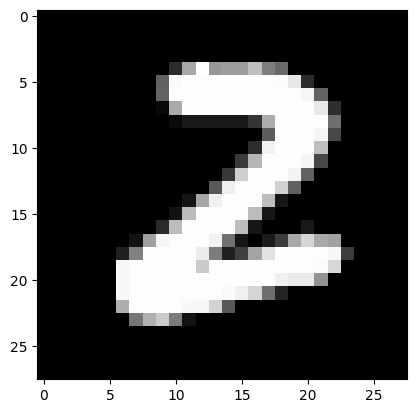

In [4]:
import random

# a random image from the training set
idx = random.randint(0, X_train.shape[0])
features = X_train[idx]
target = y_train[idx]

img = features.reshape(28, 28)
plt.imshow(img, cmap = 'gray')
plt.show()

## Data Preprocessing

A very important process when working with Neural Networks is __Rescaling__, because it is interesting that the values are rescaled **between 0 and 1 so that the training time is optimized**. We will not go into so much detail about why this optimization, but [in this link](https://stackoverflow.com/questions/4674623/why-do-we-have-to-normalize-the-input-for-an-artificial-neural-network) you can have more details about this process. Then, we make the division corresponding to the pixels of the images by the maximum value pixel of the **training set**.

In [5]:
max = np.max(X_train)

X_train = X_train/max
X_test = X_test/max

In classification neural network models, we necessarily **must have the target transformed into dummy variables**, because our response needs to have the correct output structure. We can do this with the __OneHot Encoder__.

This type of mapping is a vector with the same number of existing classes, with each position in this vector corresponding to one of the classes (In our case, as we have 10 possible classes (ie. 0-9 digits), this vector will have 10 elements).

In [6]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
from sklearn.preprocessing import OneHotEncoder

hot = OneHotEncoder()

y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.fit_transform(y_test.reshape(-1, 1)).toarray()

In [8]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Validation Set

In neural network models, it is important that there is a third set in addition to training and testing, the **validation set**.

During the training, depending on the case, **the risk of overfitting is quite high**. One way to check and avoid this is through the validation set, which is a subset of the training set that is not used by the optimizer.

It is expected that the value of the loss function (loss) will decrease with each epoch, both for the training set and for the validation set. However, if the loss function decreases for the training set and increases for the validation set (thus occurring a detachment), we can conclude that overfitting is occurring for the training set. The process should then be interrupted. This behavior can be seen more easily in the next topics.

To make the division, we use the `` train_test_split`` function of `` sklearn`` and define that the validation set will be 10% of the training set.

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  test_size = 0.1,
                                                  random_state = 42,
                                                  stratify = y_train)

In [10]:
print(X_train.shape, X_val.shape, X_test.shape)

(54000, 784) (6000, 784) (10000, 784)


In [11]:
print(y_train.shape, y_val.shape, y_test.shape)

(54000, 10) (6000, 10) (10000, 10)


## Network Architecture

We will build a simple network with:

- **3 hidden layers**
- **25 neurons each**
- **dense layers**
- **ReLu activation function in the hidden layers**
- **10 neurons and Softmax activation in the output layer**

For the construction of the neural network, we will use the [Keras](https://keras.io/) library.

First we define that our network is of the **sequential** type, using the ``Sequential()`` function. Keras works in a super intuitive way: we build **the architecture** of our neural network layer by layer, thus building the neural network the way we want. [Click here](https://keras.io/api/layers/) to learn more about the Keras layer structure, and take a look at the available layers.

This way, we use the ``.add()`` method to add the layers, one after the other, so that the output of the previous layer is the input of the next layer.

> The first layer added is a **dense layer (fully connected)** with 25 neurons. For this, the ``Dense()`` function is used, which connects all input values and all neurons in the layer.
In the first layer, it is necessary to **define the dimension of the input data**. In subsequent layers this will not be necessary, since Keras will automatically determine that the input dimension will be the dimension of the output of the previous layer.
In the case of the network in question, the **784 pixels of the image will all be connected, one by one, to the 25 neurons of the first layer, producing 25 outputs in this layer**.

> After the dense layer, it is necessary to insert **the activation layer**, through the ``Activation()`` function. When using this function, it is necessary to define which function will actually be used by passing a string as a parameter to the function. Among those available in Keras are ``'tanh'``, ``'sigmoid'``, ``'softmax'`` and ``'relu'``. In this layer, ``ReLu`` will be used.

In this process, the ``Dense()`` and ``Activation()`` functions are repeated two more times with the same parameters.

> Afterward, being a classification problem with 10 different classes, it is important that the **output layer has 10 neurons**. In this way, each neuron will represent a class, and the final prediction will be the one corresponding to the neuron **with the highest output value**.

Other important factor is the use of a **Softmax activation layer after this last layer with 10 neurons**. The Softmax activation works as a more generalized version of the sigmoid (or logistic) function, used for **multiclass predictions**. That is, with values between 0 and 1, the output of each neuron can be interpreted as the **probability of that instance belonging to that class**.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [13]:
# instanciate model
simple_nn = Sequential()

# define input layer and first hidden layer
simple_nn.add(Dense(25, input_dim = X_train.shape[1]))
simple_nn.add(Activation('relu'))

# define second hidden layer
simple_nn.add(Dense(25))
simple_nn.add(Activation('relu'))

# define third hidden layer
simple_nn.add(Dense(25))
simple_nn.add(Activation('relu'))

# output layer
simple_nn.add(Dense(y_train.shape[1]))
simple_nn.add(Activation('softmax'))

The network must then be compiled using the ``compile()`` method. The [loss function](https://keras.io/losses/) and the [optimizer](https://keras.io/optimizers/) to be used must be passed.
 
For the loss function, we use ``categorial_crossentropy`` because it is a **multiclass classification problem** (not binary).

The optimizer chosen was ``RMSprop()``. The optimizer is the algorithm that will be used to minimize the loss function. Different loss functions have different purposes, and should be chosen on a case-by-case basis. Optimizers have more freedom of choice, there is no closed rule.

Article about `RMSprop`: [here](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a)

Article about Gradient Descent, Adam and other methods: [here](https://towardsdatascience.com/how-do-we-train-neural-networks-edd985562b73)

The architecture of the network can be viewed with the ``.summary()`` method.

In [14]:
from tensorflow.keras.optimizers import RMSprop

simple_nn.compile(loss = 'categorical_crossentropy',
                  optimizer = RMSprop())

initial_weights = simple_nn.get_weights()

simple_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 activation (Activation)     (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 activation_1 (Activation)   (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 activation_2 (Activation)   (None, 25)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                2

## Training

Now comes the part of training the neural network. For this, just use the ``.fit()`` method and define the number of epochs, training set and validation set. The ``verbose`` parameter defines whether training information should be displayed on the screen at each epoch.

In [15]:
historic = simple_nn.fit(X_train,
                             y_train,
                             epochs = 20,
                             verbose = 1,
                             validation_data = (X_val, y_val))

Epoch 1/20
1688/1688 [==============================] - 1s 529us/step - loss: 0.4004 - val_loss: 0.2928
Epoch 2/20
1688/1688 [==============================] - 1s 469us/step - loss: 0.2004 - val_loss: 0.1957
Epoch 3/20
1688/1688 [==============================] - 1s 466us/step - loss: 0.1650 - val_loss: 0.1774
Epoch 4/20
1688/1688 [==============================] - 1s 468us/step - loss: 0.1441 - val_loss: 0.1802
Epoch 5/20
1688/1688 [==============================] - 1s 477us/step - loss: 0.1304 - val_loss: 0.1683
Epoch 6/20
1688/1688 [==============================] - 1s 478us/step - loss: 0.1215 - val_loss: 0.1709
Epoch 7/20
1688/1688 [==============================] - 1s 470us/step - loss: 0.1122 - val_loss: 0.1706
Epoch 8/20
1688/1688 [==============================] - 1s 479us/step - loss: 0.1058 - val_loss: 0.1687
Epoch 9/20
1688/1688 [==============================] - 1s 468us/step - loss: 0.1032 - val_loss: 0.1792
Epoch 10/20
1688/1688 [==============================] - 1s 473u

The training of a neural network (and of every machine learning model, in fact) consists of an **optimization problem**, in which we want to find **the minimum value of the loss function**.

In our case, the loss function is the "__categorical crossentropy__, whose mathematical expression is:

$$ L(y, \hat{y}) = - \sum_i{y_i \log \hat{y}_i}$$ 

where $\hat{y}$, the model prediction, is a very complicated expression, which relates all the weights and activation functions of the entire neural network.

As mentioned, neural networks use the **Backward Propagation** procedure in their training (whose objective is to **determine the weights**):

<img src="https://machinelearningknowledge.ai/wp-content/uploads/2019/10/Backpropagation.gif" width=600>

Mathematically, Backward Propagation is implemented through some **optimization method**, in order to **determine the weights that minimize the loss function**. The main method used for this purpose is **gradient descent**.

Then, what is happening above is that **in each epoch**, Keras does Forward Propagation, evaluates the predictions, and then proceeds with Backward Propagation to update the weights. This process is performed by the number of times (epochs) that we determine.

After the __trained model__, now we must **make predictions** and **evaluate performance**:

In [16]:
y_pred = np.argmax(simple_nn.predict(X_test), axis = 1)
y_pred

313/313 [==============================] - 0s 329us/step


array([7, 2, 1, ..., 4, 5, 6])

In [17]:
y_test = np.argmax(y_test, axis = 1)
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.95      0.97      0.96      1032
           3       0.98      0.94      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.94      0.97      0.95       892
           6       0.96      0.96      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.94      0.96      0.95       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



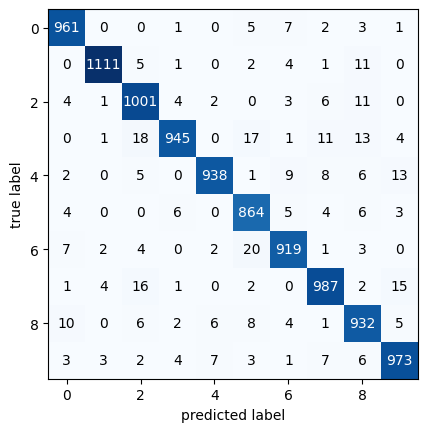

In [19]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = cm)
plt.show()

The model had a very good performance, with an accuracy of 96%, but some things should be observed from this result such as the possibility of __Overfitting__.

The **Overfitting** is something that can be quite common in neural networks if not well treated, because it is a highly non-linear model. Remembering, overfitting is closely related to the bias-variance tradeoff:

<img src="https://www.learnopencv.com/wp-content/uploads/2017/02/Bias-Variance-Tradeoff-In-Machine-Learning-1.png" width=600>

We can visualize this characteristic in our model by **plotting** the value of the **loss function** at each epoch:

In [20]:
loss = historic.history['loss']
val_loss = historic.history['val_loss']
epochs = range(len(loss))

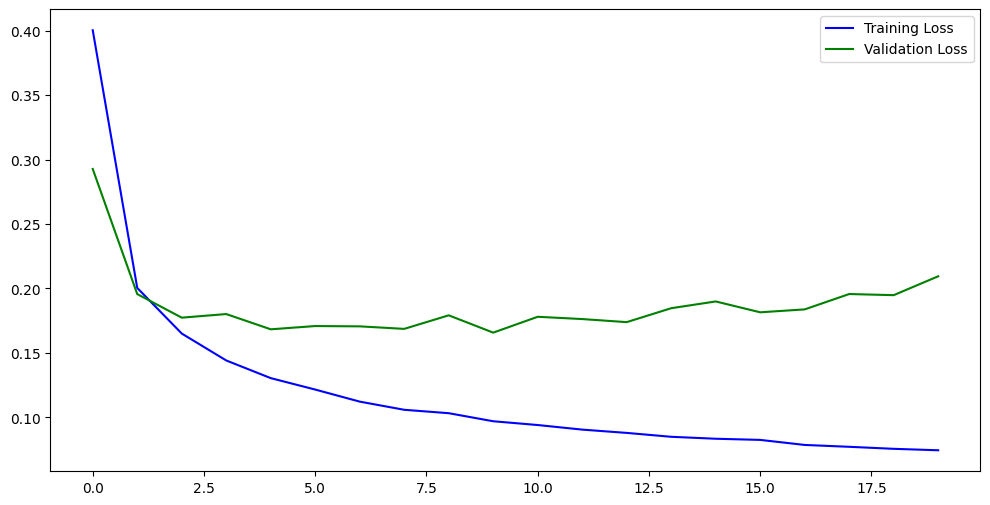

In [21]:
plt.figure(figsize = (12, 6))
plt.plot(epochs, loss, 'blue', label = 'Training Loss')
plt.plot(epochs, val_loss, 'green', label = 'Validation Loss')
plt.legend()
plt.show()

By the graph, it is possible to notice that more or less from the 15th epoch the loss function continued to decrease for the training set, but for the validation set it remained fixed for a while and then started to lose performance. We have, therefore, a strong indication that overfitting is starting to occur. To avoid this, it may be interesting that the **training be interrupted before overfitting begins to occur**. This technique is known as **early stopping**.

### Early Stopping

In order to interrupt a training, we can use the ``EarlyStopping()`` callback. This callback can receive some parameters, such as what it should monitor (``monitor``), the minimum difference that should be considered to be a breakthrough (``min_delta``) and the number of epochs that should remain without progress until actually interrupting the training (``patience``). In the example below, we are monitoring the loss function of the validation set, considering a minimum advance of 0.001 and patience of 10 epochs.

That is, **if the loss function in validation does not have a reduction of at least 0.001 for 10 epochs**, the training will be interrupted.

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss',
                           min_delta = 0.001,
                          patience = 10,
                          verbose = 1,
                          mode = 'auto')

In [23]:
# reset weights to initial values

simple_nn.set_weights(initial_weights)

historic = simple_nn.fit(X_train,
                             y_train,
                             epochs = 20,
                             verbose = 1,
                             validation_data = (X_val, y_val),
                             callbacks = [early_stop])

Epoch 1/20
1688/1688 [==============================] - 1s 536us/step - loss: 0.4331 - val_loss: 0.2620
Epoch 2/20
1688/1688 [==============================] - 1s 500us/step - loss: 0.2075 - val_loss: 0.1990
Epoch 3/20
1688/1688 [==============================] - 1s 590us/step - loss: 0.1666 - val_loss: 0.1840
Epoch 4/20
1688/1688 [==============================] - 1s 495us/step - loss: 0.1437 - val_loss: 0.1723
Epoch 5/20
1688/1688 [==============================] - 1s 504us/step - loss: 0.1302 - val_loss: 0.1742
Epoch 6/20
1688/1688 [==============================] - 1s 495us/step - loss: 0.1184 - val_loss: 0.1765
Epoch 7/20
1688/1688 [==============================] - 1s 505us/step - loss: 0.1122 - val_loss: 0.1616
Epoch 8/20
1688/1688 [==============================] - 1s 581us/step - loss: 0.1045 - val_loss: 0.1611
Epoch 9/20
1688/1688 [==============================] - 1s 526us/step - loss: 0.1006 - val_loss: 0.1644
Epoch 10/20
1688/1688 [==============================] - 1s 496u

It is possible to notice that the training was interrupted shortly after __epoch 15__, well before the total number of epochs initially defined. Now let's make predictions and evaluate the model:

In [24]:
# loss e val_loss
loss = historic.history['loss']
val_loss = historic.history['val_loss']
epochs = range(len(loss))

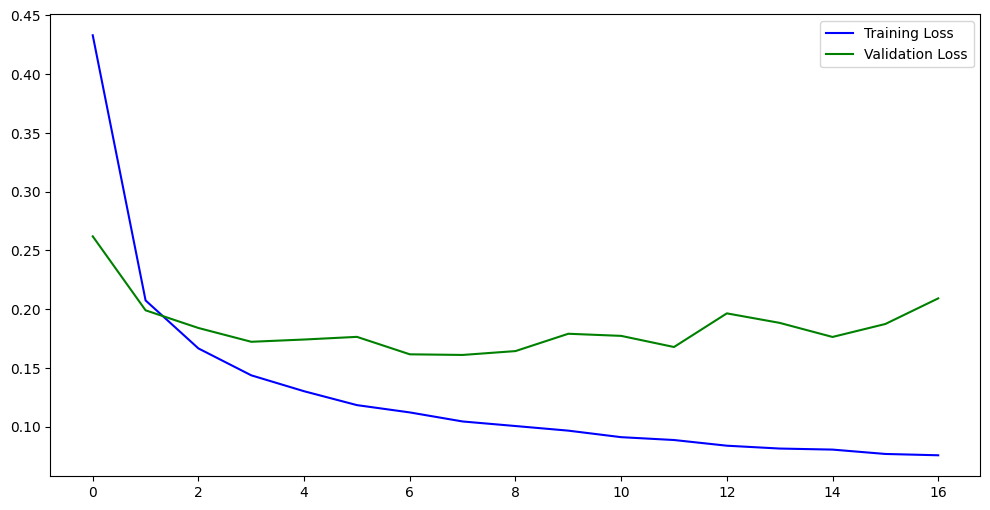

In [25]:
plt.figure(figsize = (12, 6))
plt.plot(epochs, loss, 'blue', label = 'Training Loss')
plt.plot(epochs, val_loss, 'green', label = 'Validation Loss')
plt.legend()
plt.show()

In [26]:
y_pred = np.argmax(simple_nn.predict(X_test), axis = 1)
y_pred

313/313 [==============================] - 0s 340us/step


array([7, 2, 1, ..., 4, 5, 6])

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.94      0.98      0.96      1032
           3       0.95      0.95      0.95      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.92      0.95       892
           6       0.96      0.96      0.96       958
           7       0.95      0.96      0.96      1028
           8       0.94      0.95      0.94       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



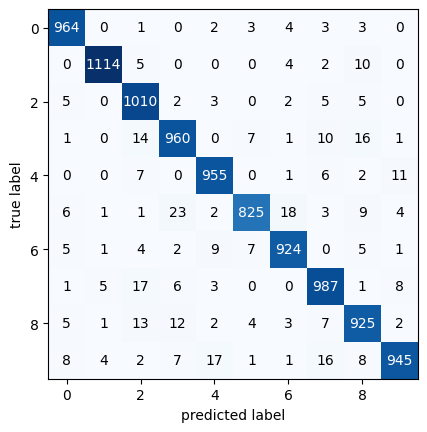

In [28]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat = cm)
plt.show()

Now guaranteeing that there was no displacement between __training__ and __validation__ we get a very good result for our model, and this is a strong indication that Early Stopping helped to avoid Overfitting.

We saw above a way to avoid Overfitting in Neural Networks, but this is definitely not the only way. There are countless techniques to mitigate this problem, among them the application of **regularization techniques** (read about it [here](https://towardsdatascience.com/how-to-improve-a-neural-network-with-regularization-8a18ecda9fe3) and [here](https://towardsdatascience.com/regularization-techniques-and-their-implementation-in-tensorflow-keras-c06e7551e709)), whose implementation exists in Keras (more information [here](https://keras.io/api/layers/regularization_layers/) and [here](https://keras.io/api/layers/regularizers/)).